In [1]:
# Loading The Data

import pandas as pd

# Load the data from Excel files
file1 = 'Unemployment in India.xlsx'
file2 = 'Unemployment_Rate_upto_11_2020.xlsx'

data1 = pd.read_excel(file1)
data2 = pd.read_excel(file2)

# Display the first few rows of each dataset
print(data1.head())
print(data2.head())


           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
4  Andhra Pradesh  30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  
           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-01-2020      

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64
Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----    

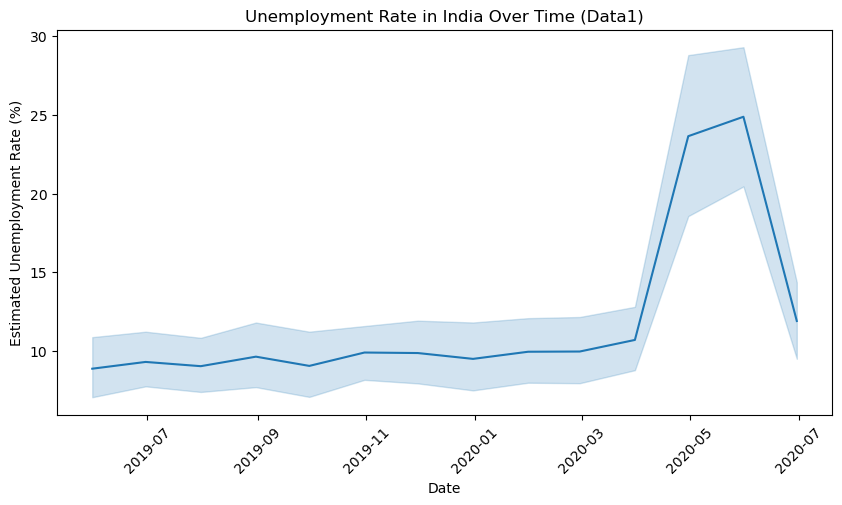

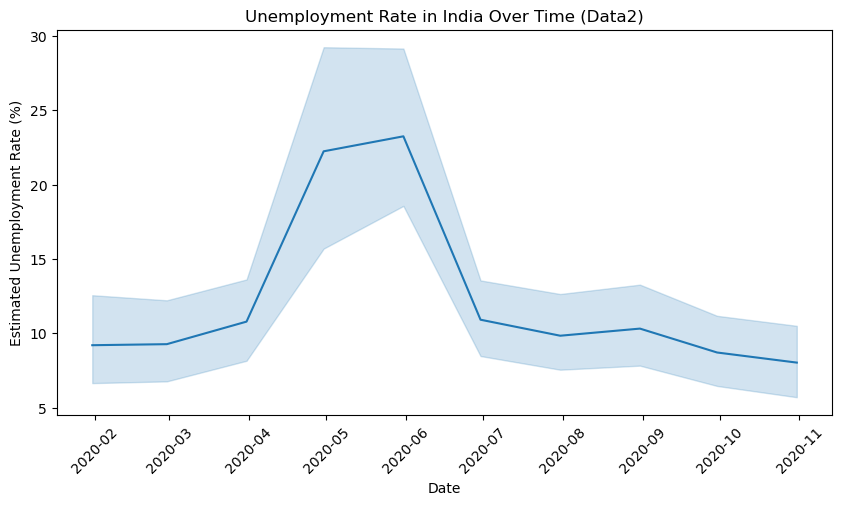

In [9]:
# Data Cleaning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Disable warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

# Load the data from Excel files
file1 = 'Unemployment in India.xlsx'
file2 = 'Unemployment_Rate_upto_11_2020.xlsx'

data1 = pd.read_excel(file1)
data2 = pd.read_excel(file2)

# Strip any leading/trailing whitespace from column names
data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()

# Replace inf values with NaN
data1.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
data2.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Check for missing values
print(data1.isnull().sum())
print(data2.isnull().sum())

# Handle missing values if necessary (e.g., drop or fill)
data1 = data1.dropna()
data2 = data2.dropna()

# Ensure data types are correct (e.g., Date columns should be datetime)
data1['Date'] = pd.to_datetime(data1['Date'], dayfirst=True)
data2['Date'] = pd.to_datetime(data2['Date'], dayfirst=True)

# Display cleaned data info
print(data1.info())
print(data2.info())

# Data Analysis and Visualization
plt.figure(figsize=(10, 5))
sns.lineplot(data=data1, x='Date', y='Estimated Unemployment Rate (%)')  # Use the correct column name
plt.title('Unemployment Rate in India Over Time (Data1)')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=data2, x='Date', y='Estimated Unemployment Rate (%)')  # Use the correct column name
plt.title('Unemployment Rate in India Over Time (Data2)')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Descriptive Statistics

# Descriptive Statistics
print("Descriptive Statistics for Data1:")
print(data1['Estimated Unemployment Rate (%)'].describe())

print("\nDescriptive Statistics for Data2:")
print(data2['Estimated Unemployment Rate (%)'].describe())


Descriptive Statistics for Data1:
count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Estimated Unemployment Rate (%), dtype: float64

Descriptive Statistics for Data2:
count    267.000000
mean      12.236929
std       10.803283
min        0.500000
25%        4.845000
50%        9.650000
75%       16.755000
max       75.850000
Name: Estimated Unemployment Rate (%), dtype: float64


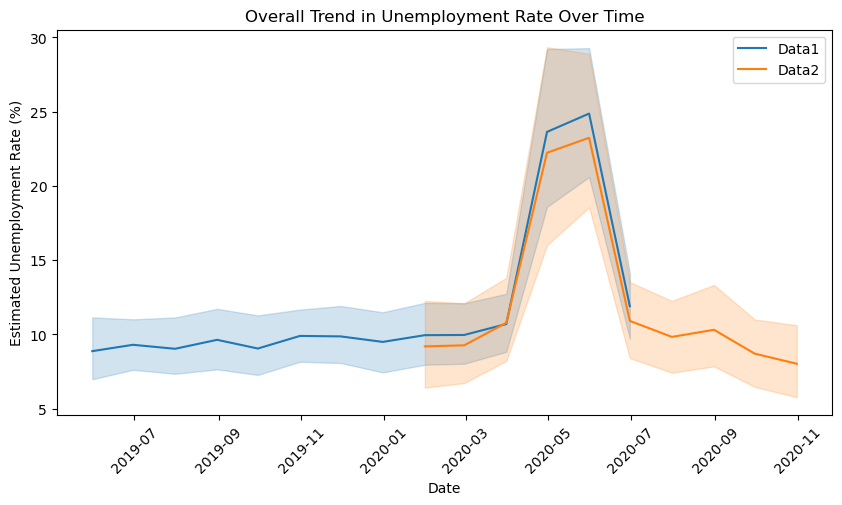

In [11]:
# Trend Analysis

plt.figure(figsize=(10, 5))
sns.lineplot(data=data1, x='Date', y='Estimated Unemployment Rate (%)', label='Data1')
sns.lineplot(data=data2, x='Date', y='Estimated Unemployment Rate (%)', label='Data2')
plt.title('Overall Trend in Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


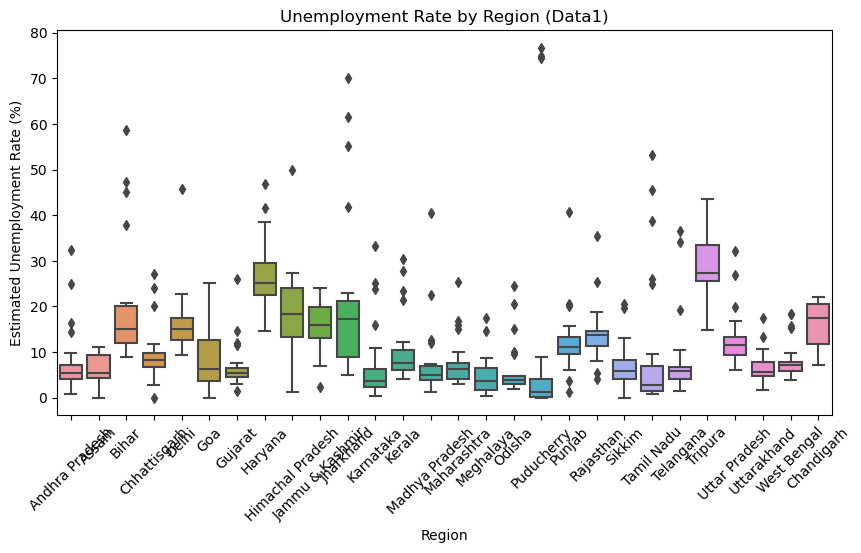

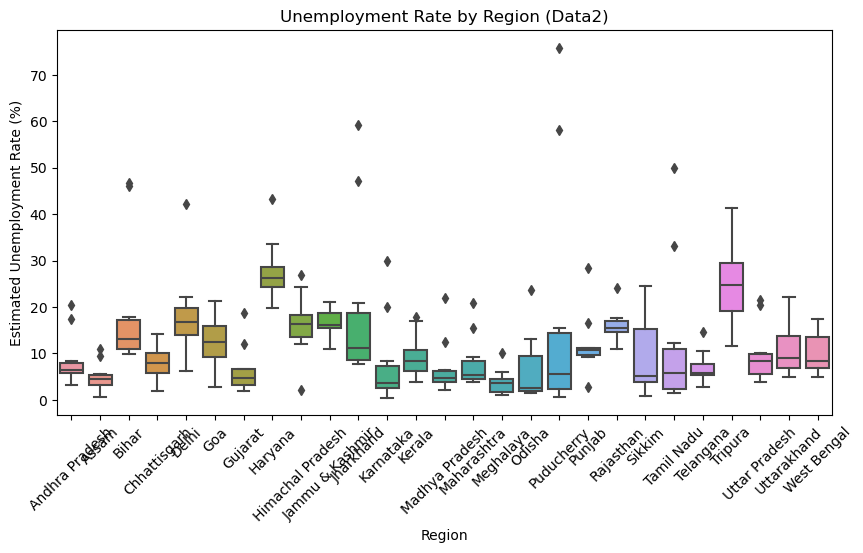

In [12]:
# Comparative Analysis

plt.figure(figsize=(10, 5))
sns.boxplot(data=data1, x='Region', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Region (Data1)')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data2, x='Region', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Region (Data2)')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


Correlation Matrix for Data1:
                                         Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Employed                                             -0.222876   
Estimated Labour Participation Rate (%)                         0.002558   

                                         Estimated Employed  \
Estimated Unemployment Rate (%)                   -0.222876   
Estimated Employed                                 1.000000   
Estimated Labour Participation Rate (%)            0.011300   

                                         Estimated Labour Participation Rate (%)  
Estimated Unemployment Rate (%)                                         0.002558  
Estimated Employed                                                      0.011300  
Estimated Labour Participation Rate (%)                                 1.000000  

Correlation Matrix for Data2:
                                         Estimate

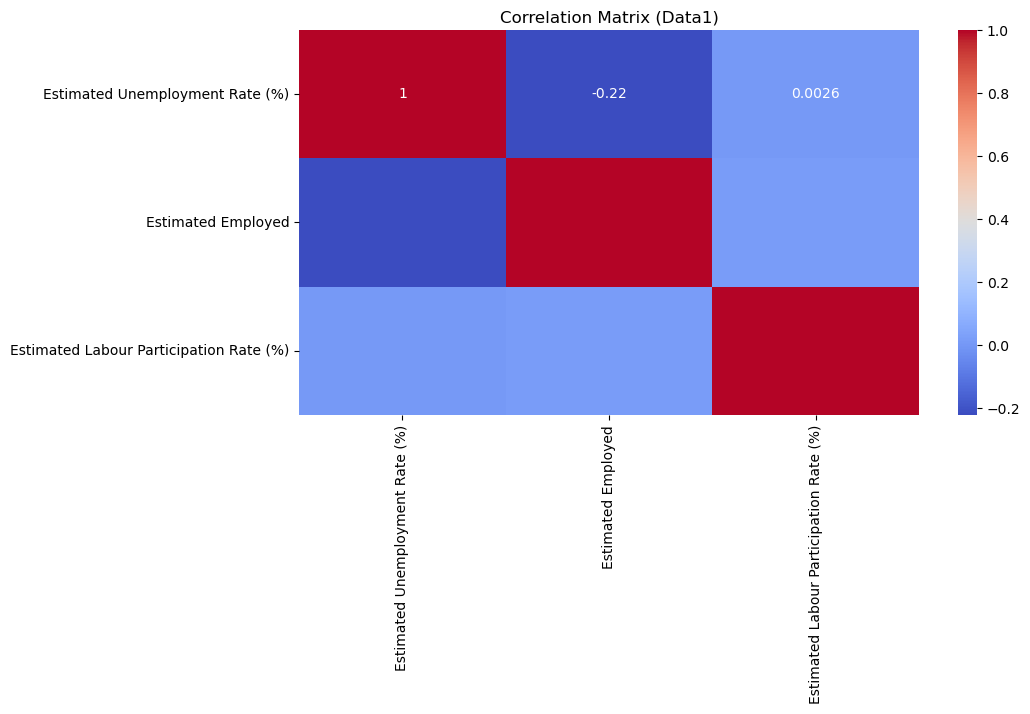

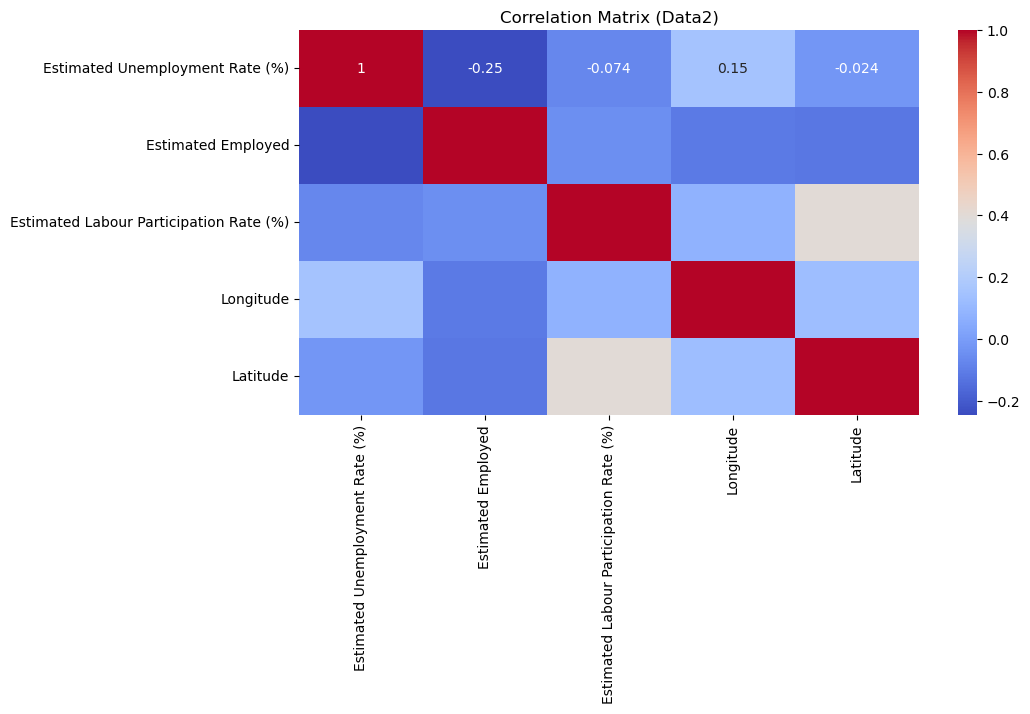

In [15]:
# Correlation Analysis

import numpy as np
# Select only numeric columns for correlation analysis
numeric_cols1 = data1.select_dtypes(include=[np.number])
numeric_cols2 = data2.select_dtypes(include=[np.number])

# Calculate correlation matrices
correlation_matrix1 = numeric_cols1.corr()
correlation_matrix2 = numeric_cols2.corr()

# Print correlation matrices
print("Correlation Matrix for Data1:")
print(correlation_matrix1)

print("\nCorrelation Matrix for Data2:")
print(correlation_matrix2)

# Plot correlation matrices
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Data1)')
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Data2)')
plt.show()


In [10]:
# Fit the ARIMA model on data1
model1 = ARIMA(data1['Estimated Unemployment Rate (%)'], order=(5,1,0))
model_fit1 = model1.fit()
print(model_fit1.summary())

# Fit the ARIMA model on data2
model2 = ARIMA(data2['Estimated Unemployment Rate (%)'], order=(5,1,0))
model_fit2 = model2.fit()
print(model_fit2.summary())


                                      SARIMAX Results                                      
Dep. Variable:     Estimated Unemployment Rate (%)   No. Observations:                  267
Model:                              ARIMA(5, 1, 0)   Log Likelihood                -988.237
Date:                             Wed, 05 Jun 2024   AIC                           1988.473
Time:                                     18:25:43   BIC                           2009.974
Sample:                                          0   HQIC                          1997.111
                                             - 267                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2988      0.063     -4.712      0.000      -0.423      -0.175
ar.L2         -0.3743      

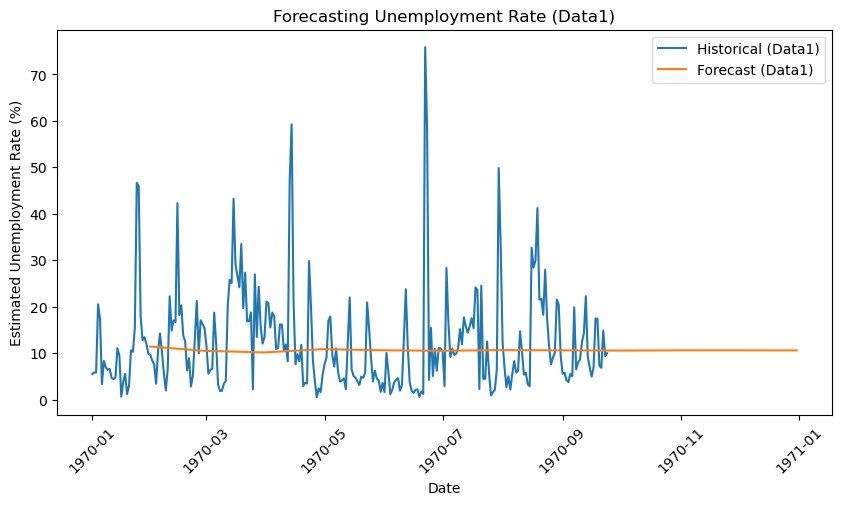

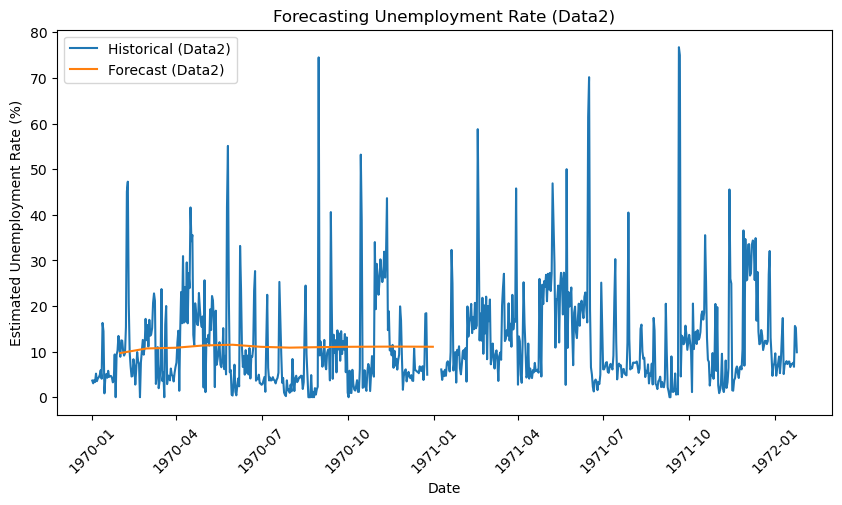

In [11]:
# Forecast future values
forecast1 = model_fit1.forecast(steps=12)
forecast2 = model_fit2.forecast(steps=12)

# Plot the historical and forecasted values for data1
plt.figure(figsize=(10, 5))
plt.plot(data1.index, data1['Estimated Unemployment Rate (%)'], label='Historical (Data1)')
plt.plot(pd.date_range(start=data1.index[-1], periods=12, freq='M'), forecast1, label='Forecast (Data1)')
plt.title('Forecasting Unemployment Rate (Data1)')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot the historical and forecasted values for data2
plt.figure(figsize=(10, 5))
plt.plot(data2.index, data2['Estimated Unemployment Rate (%)'], label='Historical (Data2)')
plt.plot(pd.date_range(start=data2.index[-1], periods=12, freq='M'), forecast2, label='Forecast (Data2)')
plt.title('Forecasting Unemployment Rate (Data2)')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [17]:
pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 325.1 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/614.7 kB 465.5 kB/s eta 0:00:02
   ------ ------------------------------- 102.4/614.7 kB 587.0 kB/s eta 0:00:01
   ---------- --------------------------- 163.8/614.7 kB 817.0 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/614.7 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 348.2/614.7 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/614.7 kB 1.2 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/614.7 kB 1.2 MB/s eta 0:00:01
   --------------------------------- ------ 512.0/614.7 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 k

Checking stationarity for Data1:
ADF Statistic for Data1 Log Unemployment Rate: -1.10021501454063
p-value for Data1 Log Unemployment Rate: 0.7149861522325377
Series Data1 Log Unemployment Rate is Non-Stationary

Checking stationarity for Data2:
ADF Statistic for Data2 Log Unemployment Rate: 2.661577508448267
p-value for Data2 Log Unemployment Rate: 0.9990840219828308
Series Data2 Log Unemployment Rate is Non-Stationary

Fitting ARIMA model for Data1 and forecasting:
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=48.372, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=15.501, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=17.261, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11.011, 

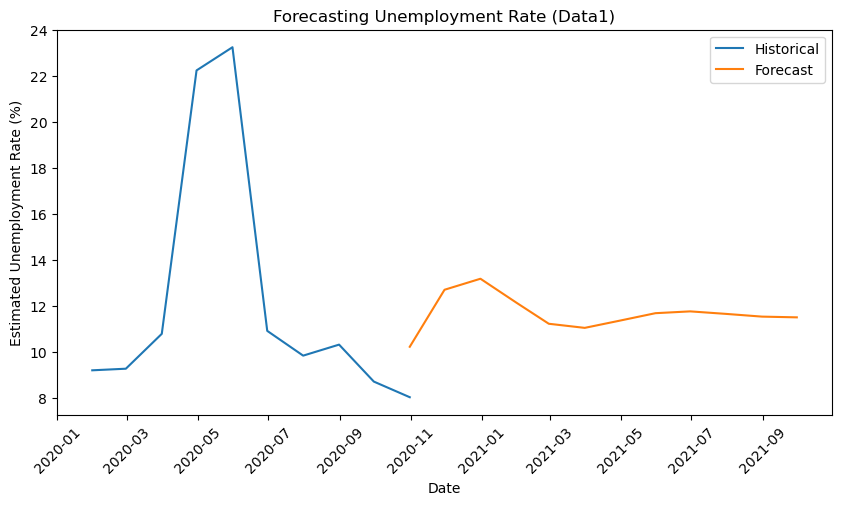

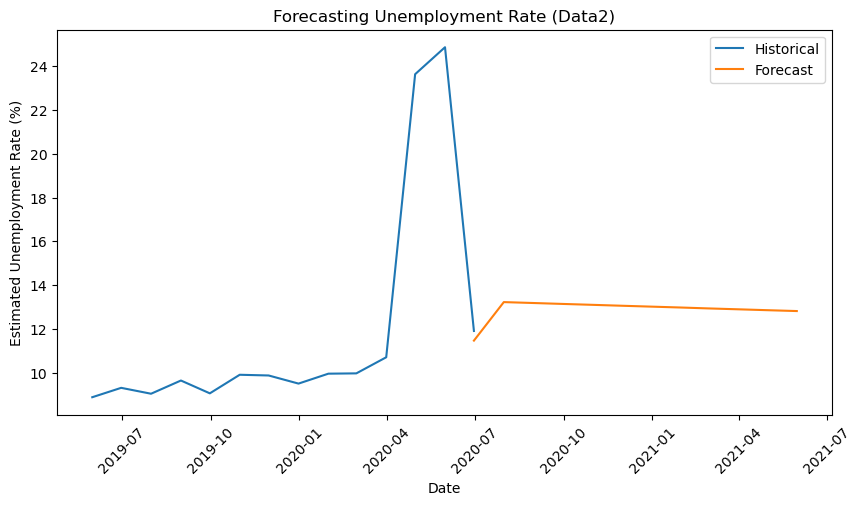

In [18]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
from pmdarima import auto_arima

# Function to load and preprocess data
def load_and_preprocess(filepath, date_col, rate_col):
    data = pd.read_excel(filepath)
    data[date_col] = pd.to_datetime(data[date_col], dayfirst=True)
    data = data[[date_col, rate_col]]
    data = data.groupby(date_col).mean().reset_index()
    data.sort_values(by=date_col, inplace=True)
    data.set_index(date_col, inplace=True)
    data = data.asfreq('M')
    data['Log_Unemployment_Rate'] = np.log(data[rate_col])
    return data

# Function to check stationarity using the Augmented Dickey-Fuller test
def check_stationarity(data, col_name):
    result = adfuller(data.dropna())
    print(f'ADF Statistic for {col_name}: {result[0]}')
    print(f'p-value for {col_name}: {result[1]}')
    if result[1] > 0.05:
        print(f'Series {col_name} is Non-Stationary\n')
    else:
        print(f'Series {col_name} is Stationary\n')

# Function to fit ARIMA model and forecast using auto_arima
def fit_and_forecast_auto_arima(data, col_name, steps=12):
    model = auto_arima(data.dropna(), seasonal=False, stepwise=True, trace=True)
    model_fit = model.fit(data.dropna())
    forecast = model_fit.predict(n_periods=steps)
    forecast_exp = np.exp(forecast)
    return forecast_exp

# Load and preprocess data
data1 = load_and_preprocess('Unemployment_Rate_upto_11_2020.xlsx', 'Date', 'Estimated Unemployment Rate (%)')
data2 = load_and_preprocess('Unemployment in India.xlsx', 'Date', 'Estimated Unemployment Rate (%)')

# Check for stationarity
print('Checking stationarity for Data1:')
check_stationarity(data1['Log_Unemployment_Rate'], 'Data1 Log Unemployment Rate')

print('Checking stationarity for Data2:')
check_stationarity(data2['Log_Unemployment_Rate'], 'Data2 Log Unemployment Rate')

# Fit ARIMA model and forecast using auto_arima
print('Fitting ARIMA model for Data1 and forecasting:')
forecast1_exp = fit_and_forecast_auto_arima(data1['Log_Unemployment_Rate'], 'Data1 Log Unemployment Rate')

print('Fitting ARIMA model for Data2 and forecasting:')
forecast2_exp = fit_and_forecast_auto_arima(data2['Log_Unemployment_Rate'], 'Data2 Log Unemployment Rate')

# Plot the historical and forecasted values
def plot_forecast(data, forecast, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data['Estimated Unemployment Rate (%)'], label='Historical')
    plt.plot(pd.date_range(start=data.index[-1], periods=len(forecast), freq='M'), forecast, label='Forecast')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Estimated Unemployment Rate (%)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

plot_forecast(data1, forecast1_exp, 'Forecasting Unemployment Rate (Data1)')
plot_forecast(data2, forecast2_exp, 'Forecasting Unemployment Rate (Data2)')
